In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange

## Descripción de las variables

* Nombre de la variable:	Descripción
* Item_Identifier:	Número de identificación único del producto
* Item_Weight:	Peso del producto
* Item_Fat_Content:	Si el producto es bajo en grasas o regular
* Item_Visibility:	El porcentaje de área total de visualización de todos los productos en la tienda asignados a este producto particular
* Item_Type:	La categoría a la que pertenece el producto
* Item_MRP:	Precio Máximo Minorista (precio de lista) del producto
* Outlet_Identifier:	Número de identificación único de la tienda
* Outlet_Establishment_Year:	El año en el que se estableció la tienda
* Outlet_Size:	El tamaño de la tienda en cuanto a la superficie total que cubre
* Outlet_Location_Type:	El tipo de área donde se ubica la tienda
* Outlet_Type:	Si la tienda es un almacén o algún tipo de supermercado
* Item_Outlet_Sales:	Las ventas del producto en la tienda particular. Esta es la variable objetivo que se debe predecir.

En primer lugar importaremos la base de datos limpia del output del trabajo anterior. 

In [22]:
df=pd.read_csv('datos_limpios.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 798.8+ KB


Para comenzar realizaremos una matriz de correlaciones para enteder cómo se correlacionan los valores númericos entre si respecto a nuestra variable objetivo que es Item_Outlet_Sales.

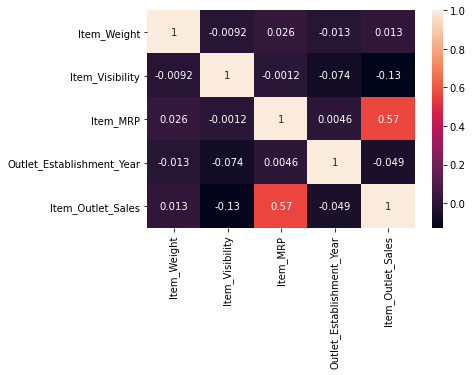

In [23]:
corrMatrix=df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

De lo anterior, podemos ver que la variable Item_MRP esta correlacionada con la variable objetivo, lo que tiene sentido pues esta variable corresponde al precio máximo minorista, por lo que se entiende que a menor precio de producto la demanda aumentaría.

A continuación revisaremos cómo se comportan las ventas respecto a las variables cualitativas. 
1. Revisaremos cómo se comportan las ventas de acuerdo a los distintos tipos de productos. Para eso graficaremoslas ventas por tipo de producto y, para descartar, revisaremos cuantos productos por tipo de producto hay por categoría.

<ipython-input-24-556929e920f3>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(nombres,rotation=90)


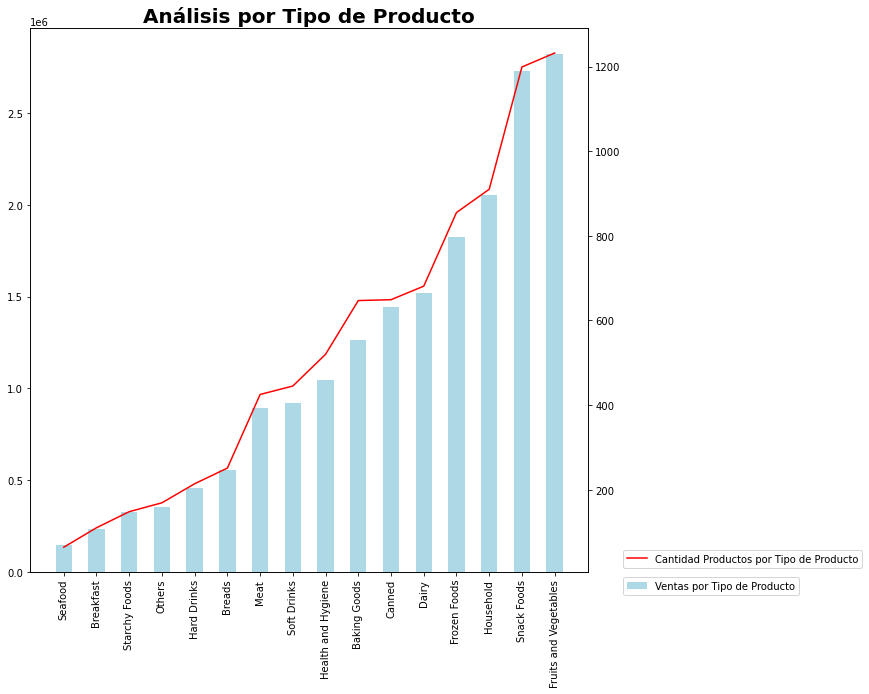

In [24]:
outlet_vs_sales=df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum().reset_index().sort_values(by='Item_Outlet_Sales')
barras=arange(len(outlet_vs_sales['Item_Type'].value_counts()))
ventas=outlet_vs_sales['Item_Outlet_Sales'].to_numpy()
nombres= outlet_vs_sales['Item_Type'].to_numpy()

productos_x_type=df.groupby(['Item_Type','Item_Identifier'])[['Item_Outlet_Sales']].sum().reset_index()
productos_x_type=df.groupby(['Item_Type'])[['Item_Identifier']].count().reset_index().sort_values(by='Item_Identifier')
barras=arange(len(productos_x_type['Item_Type'].value_counts()))
cantprod=productos_x_type['Item_Identifier'].to_numpy()
nombres= productos_x_type['Item_Type'].to_numpy()


fig, ax1 = plt.subplots(figsize=(10, 10))
ax2 = ax1.twinx()

ax1.bar(nombres, ventas, 0.5,  color='lightblue')
ax2.plot(nombres,cantprod, color='red')
ax1.set_xticklabels(nombres,rotation=90)
ax1.legend(["Ventas por Tipo de Producto"],bbox_to_anchor=(1.386,0))
ax2.legend(["Cantidad Productos por Tipo de Producto"],bbox_to_anchor=(1.5,0.05))
ax1.set_title("Análisis por Tipo de Producto", fontsize=20, fontweight='bold')


plt.show()

De lo anterior, podemos ver que las ventas se concentran principalmente en Fruits and Vegetables que es además la categoría que más volumen vende. Adicionalmente, podemos ver que la tendencia muestra que las ventas están relacionadas con la cantidad de producto y no es más bien una venta mayor debido al costo del producto como tal.

De lo anterior, para visualizar de mejor manera cómo está dividido el total de productos, podemos ver que el 28% de los productos se concentran en dos categorías: Fruits and Vegetables y Snack Foods.

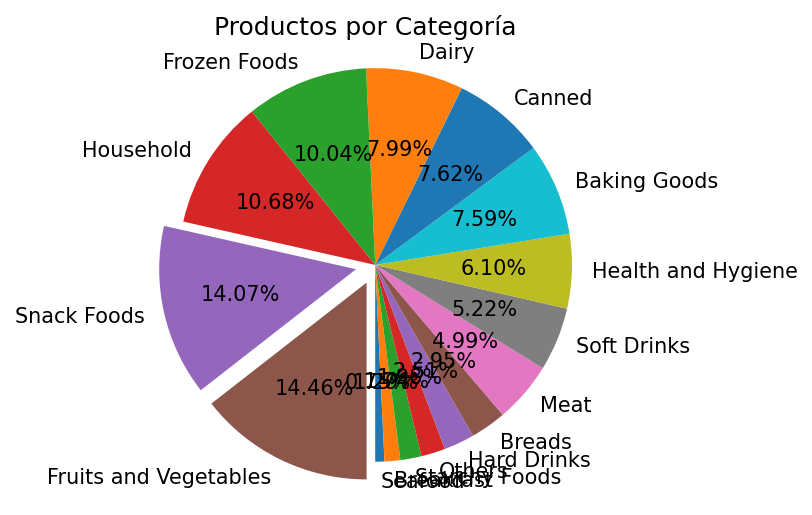

In [25]:
productos_x_type=df.groupby(['Item_Type','Item_Identifier'])[['Item_Outlet_Sales']].sum().reset_index()
productos_x_type=df.groupby(['Item_Type'])[['Item_Identifier']].count().reset_index().sort_values(by='Item_Identifier')
barras=arange(len(productos_x_type['Item_Type'].value_counts()))
cantprod=productos_x_type['Item_Identifier'].to_numpy()
nombres= productos_x_type['Item_Type'].to_numpy()
explotar = [0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0.1,0.1]

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(111)

ax1.pie(cantprod, labels=nombres, explode=explotar, autopct="%.2f%%", shadow = False, startangle=-90 )
ax1.axis("equal")
ax1.set_title('Productos por Categoría')
plt.show()

Otra variable a considerar respecto a las ventas, es como se comportan respecto al contenido de grasa. Del gráfico siguiente podemos observar que las ventas de productos bajos en grasa son menores respecto a los regulares.

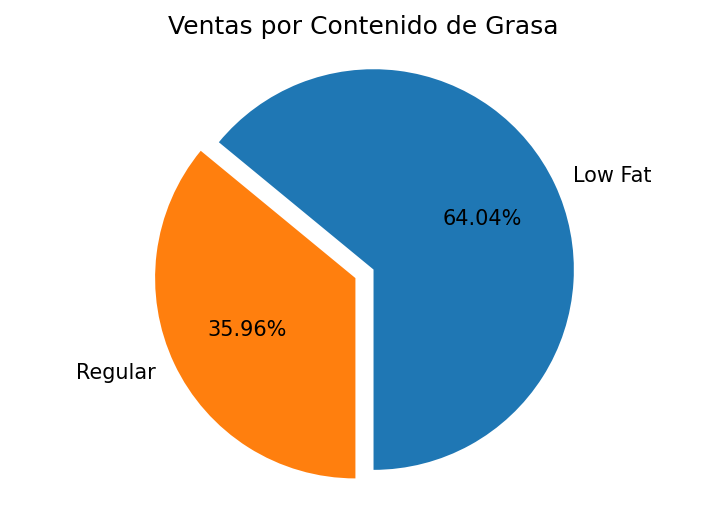

In [28]:
productos_x_type=df.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum().reset_index()
barras=arange(len(productos_x_type['Item_Fat_Content'].value_counts()))
cantprod=productos_x_type['Item_Outlet_Sales'].to_numpy()
nombres= productos_x_type['Item_Fat_Content'].to_numpy()
explotar = [0, 0.1]

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(111)

ax1.pie(cantprod, labels=nombres, explode=explotar, autopct="%.2f%%", shadow = False, startangle=-90 )
ax1.axis("equal")
ax1.set_title('Ventas por Contenido de Grasa')
plt.show()

2. Revisaremos a continuación, cómo se comportan las ventas para las distintas tiendas que hay.

En primer lugar revisamos las ventas por tienda, donde podemos ver que las tiendas OUT019 y OUT010 tienen ventas muy bajas respecto al resto de tiendas lo cual se debe a que vende significativamente menos productos que el resto, mientras que la tienda OUT 027 tiene la mayor cantidad de ventas respecto al resto, la cual vende la misma cantidad de producto que la mayoria.

<ipython-input-20-74f181f5350c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(nombres,rotation=90)


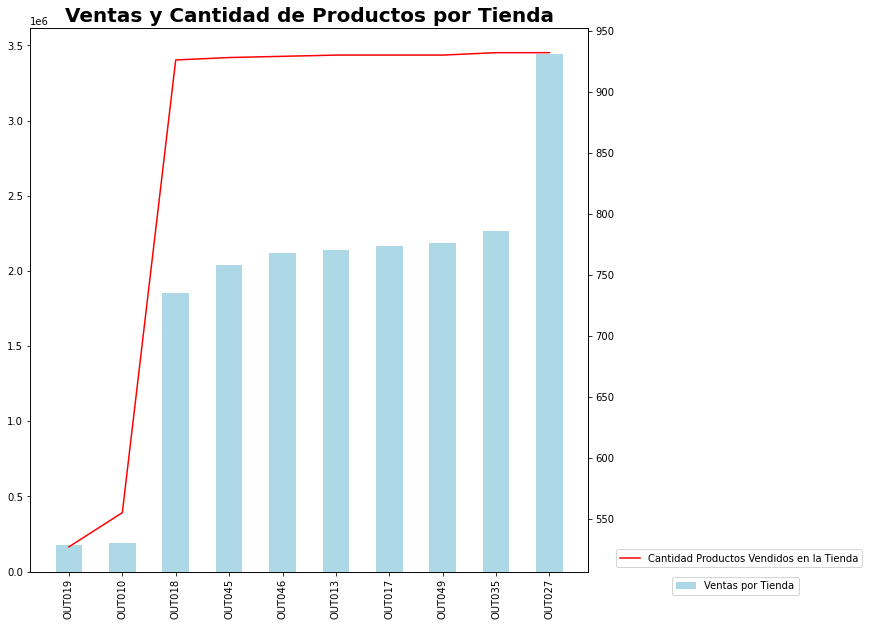

In [20]:
outlet_vs_sales=df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum().reset_index().sort_values(by='Item_Outlet_Sales')
barras=arange(len(outlet_vs_sales['Outlet_Identifier'].value_counts()))
ventas=outlet_vs_sales['Item_Outlet_Sales'].to_numpy()
nombres= outlet_vs_sales['Outlet_Identifier'].to_numpy()

productos_x_type=df.groupby(['Outlet_Identifier'])[['Item_Identifier']].count().reset_index().sort_values(by='Item_Identifier')
barras2=arange(len(productos_x_type['Outlet_Identifier'].value_counts()))
cantprod=productos_x_type['Item_Identifier'].to_numpy()
nombres2= productos_x_type['Outlet_Identifier'].to_numpy()

fig, ax1 = plt.subplots(figsize=(10, 10))
ax2 = ax1.twinx()

ax1.bar(nombres, ventas, 0.5,  color='lightblue')
ax2.plot(nombres,cantprod, color='red')
ax1.set_xticklabels(nombres,rotation=90)
ax1.legend(["Ventas por Tienda"],bbox_to_anchor=(1.386,0))
ax2.legend(["Cantidad Productos Vendidos en la Tienda"],bbox_to_anchor=(1.5,0.05))
ax1.set_title("Ventas y Cantidad de Productos por Tienda", fontsize=20, fontweight='bold')


plt.show()

Adicionalmente, revisamos cómo se comportan las ventas respecto al tipo de tienda, donde vemos que el 70% de las ventas se genera en supermercados de tipo 1, lo que nos indica que se esperaría obtener un mayor volumen de ventas en este tipo de tiendas que el resto.

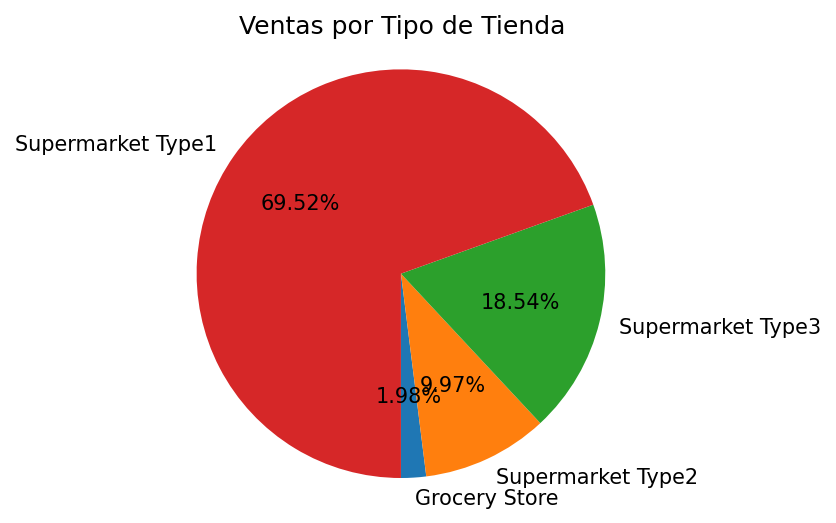

In [12]:
outlet_vs_sales=df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum().reset_index().sort_values(by='Item_Outlet_Sales')
barras=arange(len(outlet_vs_sales['Outlet_Type'].value_counts()))
ventas=outlet_vs_sales['Item_Outlet_Sales'].to_numpy()
nombres= outlet_vs_sales['Outlet_Type'].to_numpy()
explotar = []

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(111)

ax1.pie(ventas, labels=nombres, autopct="%.2f%%", shadow = False, startangle=-90 )
ax1.axis("equal")
ax1.set_title('Ventas por Tipo de Tienda')
plt.show()

Finalmente, al revisar por tipo de localidad donde se encuentra la tienda, podemos ver que las localidades tipo Tier 3 representan un 41% de las ventas, sin embargo la tendencia no es tan notoria cómo lo es el tipo de tienda por lo que puede que no sea significativo para la cantidad de ventas.

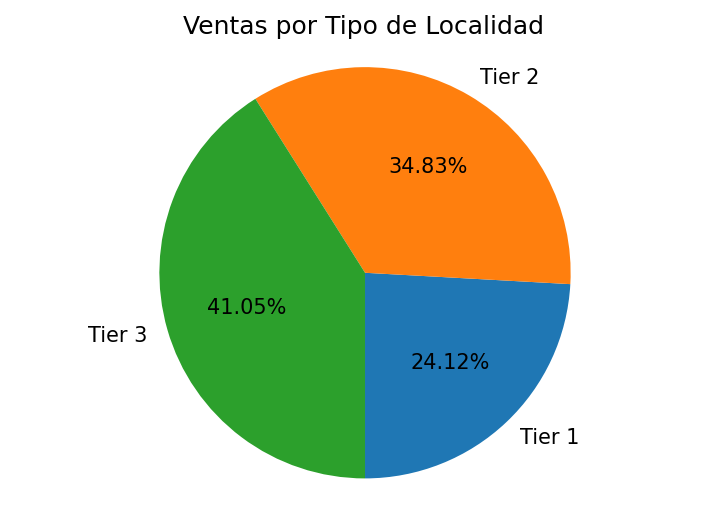

In [17]:
outlet_vs_sales=df.groupby(['Outlet_Location_Type'])[['Item_Outlet_Sales']].sum().reset_index().sort_values(by='Item_Outlet_Sales')
barras=arange(len(outlet_vs_sales['Outlet_Location_Type'].value_counts()))
ventas=outlet_vs_sales['Item_Outlet_Sales'].to_numpy()
nombres= outlet_vs_sales['Outlet_Location_Type'].to_numpy()

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(111)

ax1.pie(ventas, labels=nombres, autopct="%.2f%%", shadow = False, startangle=-90 )
ax1.axis("equal")
ax1.set_title('Ventas por Tipo de Localidad')
plt.show()